In [1]:
import torch
import numpy as np
from utils2.helpers import show_tensor_images, get_base_fname
import os
from torchvision import transforms
from torchvision.transforms import Resize, InterpolationMode
import matplotlib.pyplot as plt
from utils2.loaders_2dir_scat import IRData, train_test_split_infer, get_fs
from models.IR2DGAN_scat import Generator
import glob

[ 90 324 544 379 284]
[517   1   1 118 320]
torch.Size([64, 1, 24, 24])
torch.Size([64, 1, 24, 24])


<Figure size 1008x576 with 0 Axes>

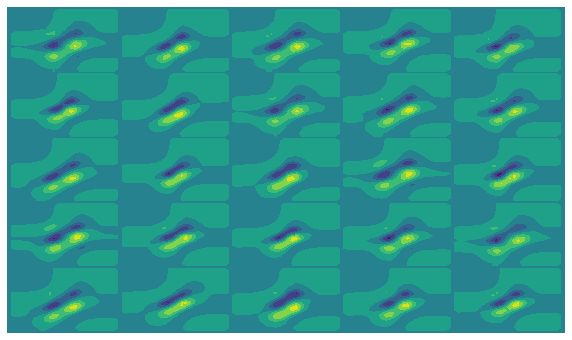

<Figure size 1008x576 with 0 Axes>

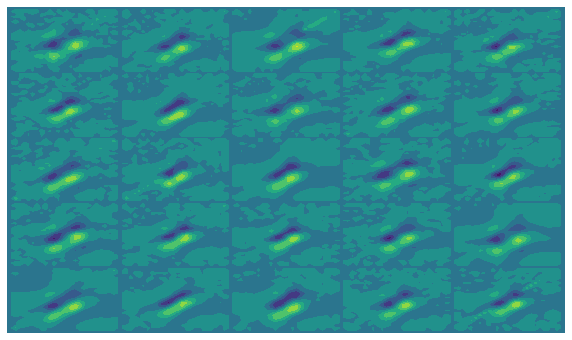

In [6]:
# get dataloaders
# datasets
training_data=IRData(hrpath=r'C:\Users\bdutta\work\Matlab\water_Matlab\data_coupling\real',
                     lrpath=r'C:\Users\bdutta\work\Matlab\water_Matlab\data_coupling\scat',
                     transform_hr=transforms.Compose([transforms.ToTensor()]),
                     transform_lr=transforms.Compose([transforms.ToTensor()])
                    )

# dataloaders
(train_ids,validation_ids,train_loader,validation_loader)=train_test_split_infer(dataset=training_data,
                                                  validation_split=0.1,
                                                  shuffle_dataset=True,
                                                  batch_size=64
                                                 )

print(train_ids[:5])
print(validation_ids[:5])

image_lr,image_hr=next(iter(train_loader))
image_lr_val,image_hr_val=next(iter(validation_loader))
    
print(image_hr.shape)
print(image_lr.shape)

plt.figure(figsize=(14,8))
show_tensor_images(image_hr)
plt.figure(figsize=(14,8))
show_tensor_images(image_lr)

In [7]:
# load model
device= 'cuda' if torch.cuda.is_available() else 'cpu'

path=r'C:\Users\bdutta\work\pys\AI_algos\GAN\srgan_weights\2dgan\scat2_upscale_layer_1'
params='October7_183834_2dgan_params_20_idx_400_lr_0.0002.pt'

gen_test= Generator(num_residual_block=6,residual_channels=64,upscale_factor=1,num_upscale_layers=1).to(device)
gen_test.load_state_dict(torch.load(os.path.join(path,params),map_location=torch.device(device)))

gen_test.eval();

In [13]:
## Train datasets
image_hr_test=gen_test(image_lr.to(torch.float32).to(device))
#plt.figure(figsize=(14,8))
#show_tensor_images(image_hr_test.detach().cpu())
#plt.figure(figsize=(14,8))
#show_tensor_images(image_lr.detach().cpu())
path=r'C:\Users\bdutta\work\pys\AI_algos\GAN\srgan_weights\2dgan\res\scat_upscale_layer_1_coupling\train'
os.chdir(path)

basename=get_base_fname()

# save lr
for idx,img in enumerate(image_lr.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'lr_orig_'+str(idx)+'.csv',dummy,delimiter=',')
    
# save hr    
for idx,img in enumerate(image_hr.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'hr_orig_'+str(idx)+'.csv',dummy,delimiter=',')
    
# save 2dgan result
for idx,img in enumerate(image_hr_test.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'hr_pred_'+str(idx)+'.csv',dummy,delimiter=',')
    
    
# save f1 & f2
(_,f1,f2)=get_fs(lrpath=r'C:\Users\bdutta\work\Matlab\water_Matlab\data_coupling\scat',indices=train_ids)
os.chdir(path)
np.savetxt(basename+'f1_list.txt',np.array(f1),fmt='%s')
np.savetxt(basename+'f2_list.txt',np.array(f2),fmt='%s')

In [11]:
np.savetxt(basename+'f1_list.txt',np.array(f1),fmt='%s')
np.savetxt(basename+'f2_list.txt',np.array(f2),fmt='%s')

In [5]:
## Test datasets
image_hr_test=gen_test(image_lr_val.to(torch.float32).to(device))

os.chdir(r'C:\Users\bdutta\work\pys\AI_algos\GAN\srgan_weights\2dgan\res\scat_upscale_layer_1\test')

basename=get_base_fname()

# save lr
for idx,img in enumerate(image_lr_val.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'lr_orig_'+str(idx)+'.csv',dummy,delimiter=',')
    
# save hr    
for idx,img in enumerate(image_hr_val.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'hr_orig_'+str(idx)+'.csv',dummy,delimiter=',')
    
# save 2dgan result
for idx,img in enumerate(image_hr_test.detach().cpu()):
    dummy=img.numpy().squeeze()
    np.savetxt(basename+'hr_pred_'+str(idx)+'.csv',dummy,delimiter=',')
    
    
# save f1 & f2
(_,f1,f2)=get_fs(lrpath=r'C:\Users\bdutta\work\Matlab\water_Matlab\data\scat',indices=validation_ids)
os.chdir(r'C:\Users\bdutta\work\pys\AI_algos\GAN\srgan_weights\2dgan\res\scat_upscale_layer_1\test')
np.savetxt(basename+'f1_list.txt',np.array(f1),fmt='%s')
np.savetxt(basename+'f2_list.txt',np.array(f2),fmt='%s')

In [9]:
f1

['sig_f1_18.csv',
 'sig_f1_390.csv',
 'sig_f1_70.csv',
 'sig_f1_44.csv',
 'sig_f1_354.csv',
 'sig_f1_274.csv',
 'sig_f1_197.csv',
 'sig_f1_169.csv',
 'sig_f1_492.csv',
 'sig_f1_500.csv',
 'sig_f1_34.csv',
 'sig_f1_435.csv',
 'sig_f1_121.csv',
 'sig_f1_175.csv',
 'sig_f1_495.csv',
 'sig_f1_220.csv',
 'sig_f1_107.csv',
 'sig_f1_479.csv',
 'sig_f1_84.csv',
 'sig_f1_449.csv',
 'sig_f1_483.csv',
 'sig_f1_135.csv',
 'sig_f1_119.csv',
 'sig_f1_212.csv',
 'sig_f1_456.csv',
 'sig_f1_267.csv',
 'sig_f1_26.csv',
 'sig_f1_123.csv',
 'sig_f1_546.csv',
 'sig_f1_299.csv',
 'sig_f1_279.csv',
 'sig_f1_497.csv',
 'sig_f1_299.csv',
 'sig_f1_568.csv',
 'sig_f1_383.csv',
 'sig_f1_281.csv',
 'sig_f1_433.csv',
 'sig_f1_223.csv',
 'sig_f1_170.csv',
 'sig_f1_110.csv',
 'sig_f1_106.csv',
 'sig_f1_257.csv',
 'sig_f1_349.csv',
 'sig_f1_145.csv',
 'sig_f1_7.csv',
 'sig_f1_284.csv',
 'sig_f1_459.csv',
 'sig_f1_320.csv',
 'sig_f1_187.csv',
 'sig_f1_34.csv',
 'sig_f1_157.csv',
 'sig_f1_173.csv',
 'sig_f1_420.csv',
 '